In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Codes available at https://github.com/udellgroup/online_mixed_gc_imp
sys.path.append("/Users/yuxuan/Documents/GitHub/online_mixed_gc_imp")
from em.expectation_maximization import ExpectationMaximization

In [3]:
data = pd.read_csv("GSS_2014_17var.csv", index_col=0)

In [4]:
# missing ratio at each column
data.apply(lambda x: np.mean(np.isnan(x)))

DEGREE      0.000000
PEOCNTCT    0.506304
STRESS      0.510244
SLPPRBLM    0.509062
WKSMOOTH    0.512214
UNEMP       0.336485
SATFIN      0.002364
CLASS_      0.007486
SATJOB      0.253349
WEEKSWRK    0.009850
LIFE        0.330181
HEALTH      0.326241
HAPPY       0.003152
RINCOME     0.399921
INCOM16     0.013396
SOCBAR      0.638298
AGE         0.003546
dtype: float64

In [5]:
# number of unique values for each column
data.apply(lambda x: len(x.unique()))

DEGREE       5
PEOCNTCT     6
STRESS       6
SLPPRBLM     5
WKSMOOTH     5
UNEMP        3
SATFIN       4
CLASS_       5
SATJOB       5
WEEKSWRK    50
LIFE         4
HEALTH       5
HAPPY        4
RINCOME     13
INCOM16      6
SOCBAR       7
AGE         73
dtype: int64

In [6]:
# summary of observed entries across rows 
data.apply(lambda x: np.sum(~np.isnan(x)), axis=1).describe()

count    2538.000000
mean       12.637904
std         2.300300
min         4.000000
25%        11.000000
50%        13.000000
75%        15.000000
max        16.000000
dtype: float64

In [7]:
datainput = data.values # transform to numpy array

In [8]:
# Model WEEKSWRK as ordinal 
gc = ExpectationMaximization()
# Specify which are ordinal variables
ord_indices = data.apply(lambda x: len(x.unique())) < 60
cont_indices = ~ord_indices
Zimp, Corr_est = gc.impute_missing(datainput, cont_indices=cont_indices, ord_indices=ord_indices, verbose=True)

Copula correlation change ratio:  0.1385
Copula correlation change ratio:  0.07
Copula correlation change ratio:  0.0383
Copula correlation change ratio:  0.0228
Copula correlation change ratio:  0.0146
Convergence at iteration 6


In [9]:
gc = ExpectationMaximization()
# Easier way: specify what variables are ordinal by setting up a largest number of unique values
Zimp, Corr_est = gc.impute_missing(datainput, max_ord=60, verbose=True)

Copula correlation change ratio:  0.1385
Copula correlation change ratio:  0.07
Copula correlation change ratio:  0.0383
Copula correlation change ratio:  0.0228
Copula correlation change ratio:  0.0146
Convergence at iteration 6


In [10]:
data_imp = pd.DataFrame(Zimp, columns = data.columns, index = data.index)
data_imp.WEEKSWRK.loc[data.WEEKSWRK.isnull()]

97      52.0
119     52.0
356     26.0
391     52.0
429      0.0
464     52.0
570     52.0
606      0.0
706      0.0
742      0.0
1090    20.0
1184    42.0
1214    40.0
1280    52.0
1320    52.0
1423     3.0
1578    52.0
1673    52.0
1991    40.0
2204    41.0
2247    24.0
2437    52.0
2443     6.0
2487    52.0
2494    20.0
Name: WEEKSWRK, dtype: float64

In [11]:
# Model WEEKSWRK as continuous
gc_2 = ExpectationMaximization()
Zimp_2, Corr_est_2 = gc_2.impute_missing(datainput, max_ord=20, max_iter = 15, verbose=True)

Copula correlation change ratio:  0.1418
Copula correlation change ratio:  0.0813
Copula correlation change ratio:  0.052
Copula correlation change ratio:  0.0361
Copula correlation change ratio:  0.0268
Copula correlation change ratio:  0.0219
Copula correlation change ratio:  0.0204
Copula correlation change ratio:  0.0214
Copula correlation change ratio:  0.0238
Copula correlation change ratio:  0.0263
Copula correlation change ratio:  0.0281
Copula correlation change ratio:  0.0288
Copula correlation change ratio:  0.0292
Copula correlation change ratio:  0.031
Copula correlation change ratio:  0.0352
Convergence not achieved at maximum iterations


In [12]:
data_imp_2 = pd.DataFrame(Zimp_2, columns = data.columns, index = data.index)
data_imp_2.WEEKSWRK.loc[data.WEEKSWRK.isnull()]

97      48.000000
119     52.000000
356      0.000000
391     40.000000
429      0.000000
464     50.000000
570      0.000000
606     26.000000
706      0.000000
742      0.000000
1090     0.000000
1184     0.000000
1214     0.000000
1280     3.000000
1320    52.000000
1423     0.000000
1578    52.000000
1673    52.000000
1991    28.000000
2204    52.000000
2247    44.000000
2437    42.657464
2443    24.000000
2487    52.000000
2494    20.000000
Name: WEEKSWRK, dtype: float64

In [13]:
data_imp_2.WEEKSWRK.loc[data.WEEKSWRK.isnull()] - data_imp.WEEKSWRK.loc[data.WEEKSWRK.isnull()]

97      -4.000000
119      0.000000
356    -26.000000
391    -12.000000
429      0.000000
464     -2.000000
570    -52.000000
606     26.000000
706      0.000000
742      0.000000
1090   -20.000000
1184   -42.000000
1214   -40.000000
1280   -49.000000
1320     0.000000
1423    -3.000000
1578     0.000000
1673     0.000000
1991   -12.000000
2204    11.000000
2247    20.000000
2437    -9.342536
2443    18.000000
2487     0.000000
2494     0.000000
Name: WEEKSWRK, dtype: float64

In [14]:
Corr_est[data.columns == "WEEKSWRK",:]

array([[ 0.21794578,  0.3590885 , -0.0932208 ,  0.03251831,  0.03844256,
        -0.09956039, -0.02466486,  0.06748999, -0.03337981,  1.        ,
        -0.13953903, -0.32961535, -0.11578046,  0.27203874,  0.06945914,
        -0.07976069, -0.36660851]])

In [15]:
Corr_est_2[data.columns == "WEEKSWRK",:] 

array([[ 0.13858441,  0.54866398, -0.15676428,  0.06624011,  0.10630411,
         0.3158009 , -0.01991434,  0.07044548, -0.03641753,  1.        ,
        -0.36666643, -0.55677385, -0.05453758,  0.56530954,  0.04007149,
         0.53666857, -0.21730335]])

In [16]:
corr = pd.DataFrame(Corr_est, columns = data.columns, index = data.columns)

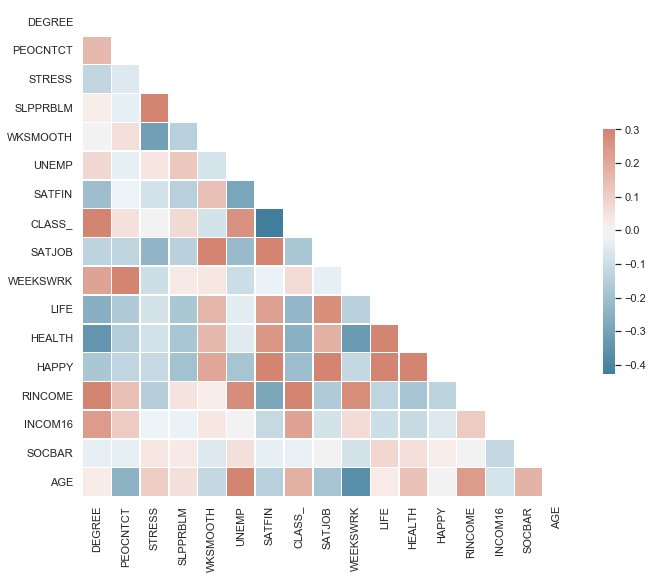

In [18]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})